In [3]:
#Libraries to use
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import chi2, mutual_info_classif
#label encoding
from sklearn.preprocessing import LabelEncoder
#logistic regresion
from sklearn.linear_model import LogisticRegression


In [4]:
Firedf = pd.read_csv("./FIREANAL_V2.csv")
Firedf.head()

,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,EOA,B,0.75,0.75,Lightning,BLM,Grant,Reg Use Closure,Does Not Apply - Eastern OR,95,7
1,EOA,C,80.00,80.00,Lightning,Other Private,Union,Reg Use Closure,Does Not Apply - Eastern OR,97,8
2,SOA,A,0.10,0.10,Human,BLM,Jackson,Reg Use Closure,Lvl 3 Restricted Shutdown,71,8
3,NOA,A,0.01,0.01,Human,State,Benton,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,55,7
4,NOA,A,0.01,0.01,Lightning,Industrial,Polk,Reg Use Closure,Lvl 3 Restricted Shutdown,55,8


In [98]:
O_Firedf = pd.read_csv("D:/1. Docs/11. Big Data, analysis & BI/10. Predictive Modeling of Megadata/FIREANAL_V2.csv")
O_Firedf.head()

,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,EOA,B,0.75,0.75,Lightning,BLM,Grant,Reg Use Closure,Does Not Apply - Eastern OR,95,7
1,EOA,C,80.00,80.00,Lightning,Other Private,Union,Reg Use Closure,Does Not Apply - Eastern OR,97,8
2,SOA,A,0.10,0.10,Human,BLM,Jackson,Reg Use Closure,Lvl 3 Restricted Shutdown,71,8
3,NOA,A,0.01,0.01,Human,State,Benton,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,55,7
4,NOA,A,0.01,0.01,Lightning,Industrial,Polk,Reg Use Closure,Lvl 3 Restricted Shutdown,55,8


In [29]:
Firedf['HumanOrLightning'].value_counts(True)

Human           0.732099
Lightning       0.266752
Under Invest    0.001149
Name: HumanOrLightning, dtype: float64

In [30]:
#We have check that ther are 7 rows how have "under investment" as HumanOrLightning, so we are deleting this for better calculations
# Define which string we want to delete
string_to_del = 'Under Invest'

# Here we delete that string from all the rows
Firedf = Firedf[Firedf['HumanOrLightning'] != string_to_del]

# we check
Firedf.head()

,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,EOA,B,0.75,0.75,Lightning,BLM,Grant,Reg Use Closure,Does Not Apply - Eastern OR,95,7
1,EOA,C,80.00,80.00,Lightning,Other Private,Union,Reg Use Closure,Does Not Apply - Eastern OR,97,8
2,SOA,A,0.10,0.10,Human,BLM,Jackson,Reg Use Closure,Lvl 3 Restricted Shutdown,71,8
3,NOA,A,0.01,0.01,Human,State,Benton,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,55,7
4,NOA,A,0.01,0.01,Lightning,Industrial,Polk,Reg Use Closure,Lvl 3 Restricted Shutdown,55,8


In [31]:
Firedf['HumanOrLightning'].value_counts(True)

Human        0.732941
Lightning    0.267059
Name: HumanOrLightning, dtype: float64

In [32]:
print(Firedf.count())
print(Firedf.shape)

Area                      23463
Size_class                23463
EstTotalAcres             23394
Protected_Acres           23463
HumanOrLightning          23463
FO_LandOwnType            23463
County                    23463
RegUseRestriction         23388
Industrial_Restriction    23388
DistrictCode              23463
Month_ReportDate          23463
dtype: int64
(23463, 11)


In [33]:
#Check for Null Values, we have 8
null_counts = Firedf.isnull().sum()
print(null_counts)

Area                       0
Size_class                 0
EstTotalAcres             69
Protected_Acres            0
HumanOrLightning           0
FO_LandOwnType             0
County                     0
RegUseRestriction         75
Industrial_Restriction    75
DistrictCode               0
Month_ReportDate           0
dtype: int64


In [34]:
#Deleating of Nulls
Firedf.replace('', np.nan, inplace=True)
#Here we delete the null values (rows)
Firedf = Firedf.dropna(how='any')


In [35]:
#Validation that the null values are deleted
null_counts = Firedf.isnull().sum()
print(null_counts)

Area                      0
Size_class                0
EstTotalAcres             0
Protected_Acres           0
HumanOrLightning          0
FO_LandOwnType            0
County                    0
RegUseRestriction         0
Industrial_Restriction    0
DistrictCode              0
Month_ReportDate          0
dtype: int64


In [113]:
print(Firedf.count())
print(Firedf.shape)

Area                      23387
Size_class                23387
EstTotalAcres             23387
Protected_Acres           23387
HumanOrLightning          23387
FO_LandOwnType            23387
County                    23387
RegUseRestriction         23387
Industrial_Restriction    23387
DistrictCode              23387
Month_ReportDate          23387
dtype: int64
(23387, 11)


In [114]:
for col in Firedf.columns:
    le = LabelEncoder()
    Firedf[col] = le.fit_transform(Firedf[col])
Firedf.head()


,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,0,1,75,75,1,2,11,4,0,10,6
1,0,2,762,746,1,8,30,4,0,11,7
2,2,0,10,10,0,2,14,4,3,5,7
3,1,0,1,1,0,12,1,1,1,3,6
4,1,0,1,1,1,4,27,4,3,3,7


In [115]:
# Assuming 'HumanOrLightning' is the target variable
labe = ['HumanOrLightning','EstTotalAcres','Protected_Acres']
X = Firedf.drop(labe, axis=1)  # Features
y = Firedf['HumanOrLightning']  # Target variable

In [116]:
chi2_scores, chi2_pvalues = chi2(X, y)

In [117]:
mutual_info_scores = mutual_info_classif(X, y)

In [118]:
# Creating a DataFrame to display the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'Chi2 p-value': chi2_pvalues, 'Mutual Info Score': mutual_info_scores})

# Sort the features by score (you can choose either Chi2 Score or Mutual Info Score)
sorted_features = feature_scores.sort_values(by='Chi2 Score', ascending=False)

# Print the sorted features
sorted_features.to_csv('Predicciones_dos_modelosV3.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


<Axes: >

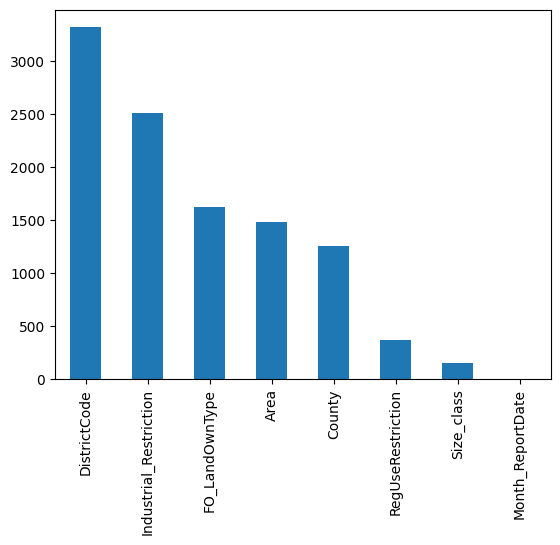

In [119]:
chi_values = pd.Series(chi2_scores, index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

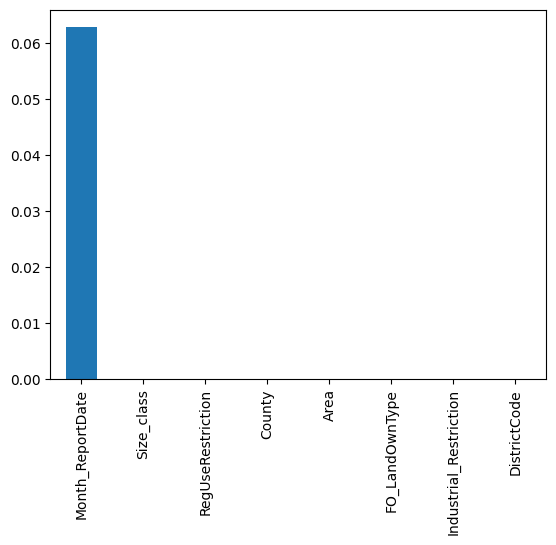

In [120]:
chi_values2 = pd.Series(chi2_pvalues, index=X.columns)
chi_values2.sort_values(ascending=False, inplace=True)
chi_values2.plot.bar()

<Axes: >

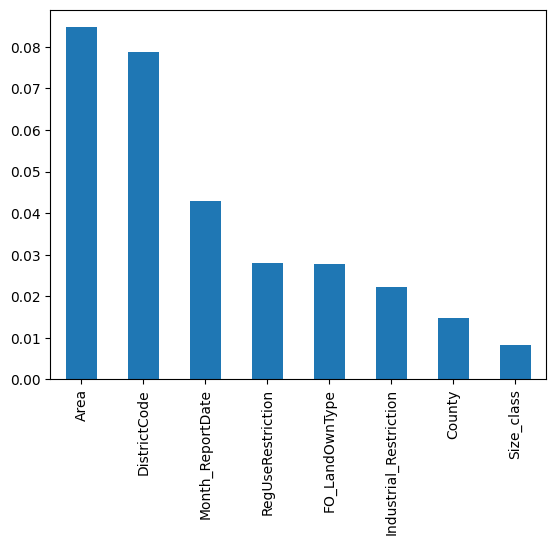

In [69]:
mutual_info_values = pd.Series(mutual_info_scores, index=X.columns)
mutual_info_values.sort_values(ascending=False, inplace=True)
mutual_info_values.plot.bar()

In [90]:
labe2 = ['HumanOrLightning','Area', 'Size_class', 'FO_LandOwnType', 'County', 'RegUseRestriction', 'Industrial_Restriction', 'DistrictCode', 'Month_ReportDate']

In [ ]:
for fire in labe2:
    print(Firedf[fire].value_counts(True))

In [94]:
#Spliting of data
train, test = train_test_split(Firedf, test_size=0.3, random_state=42)

In [ ]:
for fire in labe2:
    print(train[fire].value_counts(True))

In [ ]:
for fire in labe2:
    print(test[fire].value_counts(True))

In [95]:
train.shape[0] / Firedf.shape[0]

0.6999615170821396

In [96]:
train.head()

,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
14206,2,5,1066,550,0,5,14,4,4,5,8
632,0,3,801,789,1,8,34,4,0,10,7
9092,2,1,50,50,0,10,9,1,1,7,5
3973,2,0,25,25,0,4,14,2,5,5,10
14283,1,4,925,896,0,4,2,2,5,4,9


In [105]:
y = train["HumanOrLightning"]

features = ["Area","County","DistrictCode",'FO_LandOwnType','Industrial_Restriction']
X = train[features]
X_test = test[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({ 'Prediction': predictions, "Real": test.HumanOrLightning})
output.to_csv('New_Fire_Predictions.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [106]:
y_pred = cross_val_predict(model, X, y, cv=5)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8266951740989615
Precision: 0.6679287305122494
Recall: 0.6902186421173763
F1 Score: 0.6788907753254103
Confusion Matrix:
[[10534  1491]
 [ 1346  2999]]


In [107]:
y = train["HumanOrLightning"]

features = ["Area","County","DistrictCode",'FO_LandOwnType','Industrial_Restriction']
X = train[features]
X_test = test[features]

model = LogisticRegression(penalty='l2',dual=False, tol=0.0001, 
                                              C=1.0, fit_intercept=True, intercept_scaling=1, 
                                              class_weight=None, random_state=None, solver='lbfgs', 
                                              max_iter=100, multi_class='auto', verbose=0, 
                                              warm_start=False, n_jobs=None, l1_ratio=None)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({ 'Prediction': predictions, "Real": test.HumanOrLightning})
output.to_csv('New_Fire_Predictions2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [108]:
y_pred = cross_val_predict(model, X, y, cv=5)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7609040928527795
Precision: 0.6034565530484878
Recall: 0.2892980437284235
F1 Score: 0.3911014312383323
Confusion Matrix:
[[11199   826]
 [ 3088  1257]]
